In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, Adagrad

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

Using TensorFlow backend.


In [2]:
a1 = 0.3
b1 = 0.3
a2 = 0.7
b2 = 0.7
a3 = 1
b3 = 1

In [3]:
step = 0.025
t = np.linspace(0, 2*np.pi, int(2*np.pi/step), endpoint=True)

In [4]:
def f(a, t):
    return a*np.cos(t)

def g(b, t):
    return b*np.sin(t)

In [5]:
x1 = f(a1, t)
y1 = g(b1, t)
x2= f(a2, t)
y2= g(b2, t)
x3= f(a3, t)
y3= g(b3, t)

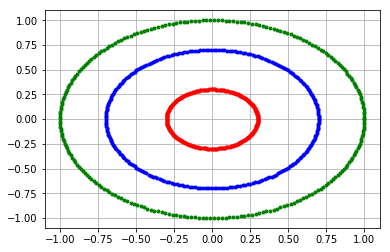

In [6]:
plt.plot(x1, y1, '.r')
plt.plot(x2, y2, '.b')
plt.plot(x3, y3, '.g')
plt.grid(True)
plt.show()

In [7]:
df1 = pd.DataFrame({'x' : x1, 'y' : y1, 'target' : 0})
df2 = pd.DataFrame({'x' : x2, 'y' : y2, 'target' : 1})
df3 = pd.DataFrame({'x' : x3, 'y' : y3, 'target' : 2})

In [8]:
def split_df(df):
    x_train, x_test = train_test_split(df, test_size=0.3, shuffle=True, random_state=21)
    x_valid, x_test = train_test_split(x_test, test_size=0.3, shuffle=True, random_state=14)
    return x_train, x_valid, x_test

In [21]:
model = Sequential()
model.add(Dense(20, input_shape=(2,), activation='tanh'))
model.add(Dense(3, activation='sigmoid'))

model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])

In [10]:
train = []
valid = []
test = []

for df in (df1, df2 ,df3):
    tr, v, te = split_df(df)
    train.append(tr)
    valid.append(v)
    test.append(te)
train = pd.concat(train)
valid = pd.concat(valid)
test = pd.concat(test)

In [22]:
y = pd.get_dummies(train['target'])
history = model.fit(train.iloc[:, :-1], y, epochs=300, shuffle=True)

Epoch 1/300
525/525 [==============================] - 0s 355us/step - loss: 0.6698 - acc: 0.6190
Epoch 2/300
525/525 [==============================] - 0s 31us/step - loss: 0.6395 - acc: 0.6667
Epoch 3/300
525/525 [==============================] - 0s 27us/step - loss: 0.6378 - acc: 0.6667
Epoch 4/300
525/525 [==============================] - 0s 29us/step - loss: 0.6354 - acc: 0.6667
Epoch 5/300
525/525 [==============================] - 0s 27us/step - loss: 0.6324 - acc: 0.6667
Epoch 6/300
525/525 [==============================] - 0s 25us/step - loss: 0.6302 - acc: 0.6667
Epoch 7/300
525/525 [==============================] - 0s 25us/step - loss: 0.6260 - acc: 0.6667
Epoch 8/300
525/525 [==============================] - 0s 29us/step - loss: 0.6186 - acc: 0.6667
Epoch 9/300
525/525 [==============================] - 0s 23us/step - loss: 0.6109 - acc: 0.6667
Epoch 10/300
525/525 [==============================] - 0s 25us/step - loss: 0.6000 - acc: 0.6667
Epoch 11/300
525/525 [======

525/525 [==============================] - 0s 23us/step - loss: 0.1048 - acc: 0.9765
Epoch 168/300
525/525 [==============================] - 0s 21us/step - loss: 0.1022 - acc: 0.9790
Epoch 169/300
525/525 [==============================] - 0s 21us/step - loss: 0.1022 - acc: 0.9778
Epoch 170/300
525/525 [==============================] - 0s 23us/step - loss: 0.1005 - acc: 0.9752
Epoch 171/300
525/525 [==============================] - 0s 19us/step - loss: 0.0983 - acc: 0.9822
Epoch 172/300
525/525 [==============================] - 0s 21us/step - loss: 0.0977 - acc: 0.9765
Epoch 173/300
525/525 [==============================] - 0s 21us/step - loss: 0.0965 - acc: 0.9810
Epoch 174/300
525/525 [==============================] - 0s 19us/step - loss: 0.0955 - acc: 0.9835
Epoch 175/300
525/525 [==============================] - 0s 21us/step - loss: 0.0937 - acc: 0.9746
Epoch 176/300
525/525 [==============================] - 0s 19us/step - loss: 0.0919 - acc: 0.9848
Epoch 177/300
525/525 [=

In [23]:
p = []

In [24]:
p.append(model.predict_classes(train.iloc[:, :-1]))
accuracy_score(train['target'], p[-1])

1.0

In [25]:
p.append(model.predict_classes(test.iloc[:, :-1]))
accuracy_score(test['target'], p[-1])

1.0

In [26]:
p.append(model.predict_classes(valid.iloc[:, :-1]))
accuracy_score(valid['target'], p[-1])

1.0

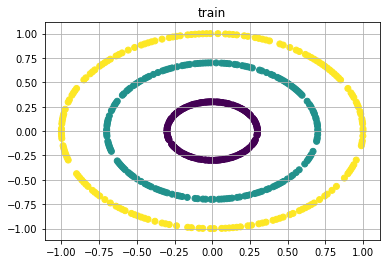

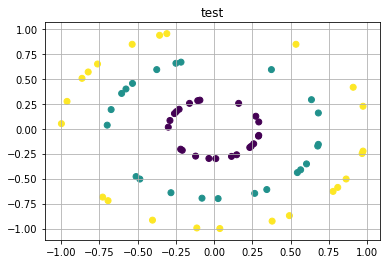

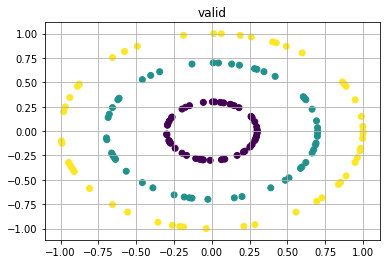

In [27]:
titles = ['train', 'test', 'valid']

for idx, df in enumerate((train, test, valid)):
    plt.scatter(df.x, df.y, c=p[idx])
    plt.grid(True)
    plt.title(titles[idx])
    plt.show()

In [28]:
h = 0.025
grid_pred = [model.predict(np.array([[i, j]])).round(1) for i in np.arange(-1.2, 1.2+h, h)
                                                       for j in np.arange(-1.2, 1.2+h, h)]

In [29]:
x_vals = np.arange(-1.2, 1.2+h, h)
y_vals = np.arange(-1.2, 1.2+h, h)

xx, yy = np.meshgrid(x_vals, y_vals)

In [30]:
rows = len(grid_pred)
colors = np.array(grid_pred).reshape((rows, 3))
colors.shape

(9409, 3)

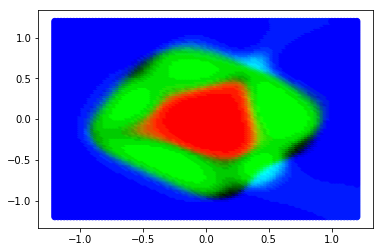

In [31]:
plt.scatter(xx, yy, c=colors);

## Задание 2

In [2]:
h = 0.02
t = np.linspace(0, 4, int(4/0.02), endpoint=True)
x = np.sin(t**2)

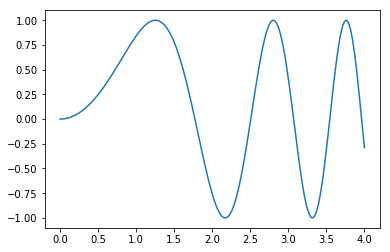

In [3]:
plt.plot(t, x);

In [4]:
train_size = int(t.shape[0] * 0.9)
train_size

180

In [5]:
X_train = t[:train_size]
y_train = x[:train_size]

X_test = t[train_size:]
y_test = x[train_size:]

In [21]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
tmp_train_scaled_x = scaler_x.fit_transform(X_train[:, np.newaxis])
tmp_test_scaled_x = scaler_x.transform(X_test[:, np.newaxis])
tmp_train_scaled_y = scaler_y.fit_transform(y_train[:, np.newaxis])

In [38]:
model = Sequential()
model.add(Dense(20, input_shape=(1,), activation='tanh'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [39]:
history = model.fit(tmp_train_scaled_x, tmp_train_scaled_y , epochs=12000, verbose=1)

Epoch 1/12000
180/180 [==============================] - 0s 940us/step - loss: 0.8941
Epoch 2/12000
180/180 [==============================] - 0s 28us/step - loss: 0.8837
Epoch 3/12000
180/180 [==============================] - 0s 28us/step - loss: 0.8772
Epoch 4/12000
180/180 [==============================] - 0s 28us/step - loss: 0.8742
Epoch 5/12000
180/180 [==============================] - 0s 28us/step - loss: 0.8715
Epoch 6/12000
180/180 [==============================] - 0s 28us/step - loss: 0.8709
Epoch 7/12000
180/180 [==============================] - 0s 22us/step - loss: 0.8712
Epoch 8/12000
180/180 [==============================] - 0s 28us/step - loss: 0.8718
Epoch 9/12000
180/180 [==============================] - 0s 22us/step - loss: 0.8707
Epoch 10/12000
180/180 [==============================] - 0s 28us/step - loss: 0.8716
Epoch 11/12000
180/180 [==============================] - 0s 28us/step - loss: 0.8705
Epoch 12/12000
180/180 [==============================] - 0s 2

180/180 [==============================] - 0s 22us/step - loss: 0.8601
Epoch 97/12000
180/180 [==============================] - 0s 22us/step - loss: 0.8600
Epoch 98/12000
180/180 [==============================] - 0s 22us/step - loss: 0.8595
Epoch 99/12000
180/180 [==============================] - 0s 22us/step - loss: 0.8596
Epoch 100/12000
180/180 [==============================] - 0s 22us/step - loss: 0.8592
Epoch 101/12000
180/180 [==============================] - 0s 22us/step - loss: 0.8594
Epoch 102/12000
180/180 [==============================] - 0s 22us/step - loss: 0.8589
Epoch 103/12000
180/180 [==============================] - 0s 22us/step - loss: 0.8586
Epoch 104/12000
180/180 [==============================] - 0s 17us/step - loss: 0.8583
Epoch 105/12000
180/180 [==============================] - 0s 17us/step - loss: 0.8583
Epoch 106/12000
180/180 [==============================] - 0s 22us/step - loss: 0.8583
Epoch 107/12000
180/180 [==============================] - 0s 

180/180 [==============================] - 0s 22us/step - loss: 0.8328
Epoch 191/12000
180/180 [==============================] - 0s 22us/step - loss: 0.8313
Epoch 192/12000
180/180 [==============================] - 0s 22us/step - loss: 0.8321
Epoch 193/12000
180/180 [==============================] - 0s 17us/step - loss: 0.8306
Epoch 194/12000
180/180 [==============================] - 0s 22us/step - loss: 0.8300
Epoch 195/12000
180/180 [==============================] - 0s 22us/step - loss: 0.8294
Epoch 196/12000
180/180 [==============================] - 0s 22us/step - loss: 0.8290
Epoch 197/12000
180/180 [==============================] - 0s 22us/step - loss: 0.8288
Epoch 198/12000
180/180 [==============================] - 0s 22us/step - loss: 0.8284
Epoch 199/12000
180/180 [==============================] - 0s 17us/step - loss: 0.8276
Epoch 200/12000
180/180 [==============================] - 0s 22us/step - loss: 0.8271
Epoch 201/12000
180/180 [==============================] - 

180/180 [==============================] - 0s 22us/step - loss: 0.7646
Epoch 285/12000
180/180 [==============================] - 0s 28us/step - loss: 0.7637
Epoch 286/12000
180/180 [==============================] - 0s 28us/step - loss: 0.7629
Epoch 287/12000
180/180 [==============================] - 0s 17us/step - loss: 0.7623
Epoch 288/12000
180/180 [==============================] - 0s 17us/step - loss: 0.7617
Epoch 289/12000
180/180 [==============================] - 0s 22us/step - loss: 0.7599
Epoch 290/12000
180/180 [==============================] - 0s 22us/step - loss: 0.7593
Epoch 291/12000
180/180 [==============================] - 0s 22us/step - loss: 0.7584
Epoch 292/12000
180/180 [==============================] - 0s 22us/step - loss: 0.7578
Epoch 293/12000
180/180 [==============================] - 0s 17us/step - loss: 0.7571
Epoch 294/12000
180/180 [==============================] - 0s 17us/step - loss: 0.7556
Epoch 295/12000
180/180 [==============================] - 

180/180 [==============================] - 0s 22us/step - loss: 0.6767
Epoch 379/12000
180/180 [==============================] - 0s 28us/step - loss: 0.6753
Epoch 380/12000
180/180 [==============================] - 0s 22us/step - loss: 0.6747
Epoch 381/12000
180/180 [==============================] - 0s 17us/step - loss: 0.6737
Epoch 382/12000
180/180 [==============================] - 0s 22us/step - loss: 0.6730
Epoch 383/12000
180/180 [==============================] - 0s 22us/step - loss: 0.6719
Epoch 384/12000
180/180 [==============================] - 0s 22us/step - loss: 0.6714
Epoch 385/12000
180/180 [==============================] - 0s 22us/step - loss: 0.6703
Epoch 386/12000
180/180 [==============================] - 0s 22us/step - loss: 0.6694
Epoch 387/12000
180/180 [==============================] - 0s 22us/step - loss: 0.6681
Epoch 388/12000
180/180 [==============================] - 0s 22us/step - loss: 0.6679
Epoch 389/12000
180/180 [==============================] - 

180/180 [==============================] - 0s 22us/step - loss: 0.6021
Epoch 473/12000
180/180 [==============================] - 0s 22us/step - loss: 0.6012
Epoch 474/12000
180/180 [==============================] - 0s 28us/step - loss: 0.6009
Epoch 475/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5997
Epoch 476/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5996
Epoch 477/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5985
Epoch 478/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5979
Epoch 479/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5973
Epoch 480/12000
180/180 [==============================] - 0s 17us/step - loss: 0.5964
Epoch 481/12000
180/180 [==============================] - 0s 17us/step - loss: 0.5965
Epoch 482/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5960
Epoch 483/12000
180/180 [==============================] - 

180/180 [==============================] - 0s 22us/step - loss: 0.5474
Epoch 567/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5469
Epoch 568/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5461
Epoch 569/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5466
Epoch 570/12000
180/180 [==============================] - 0s 17us/step - loss: 0.5455
Epoch 571/12000
180/180 [==============================] - 0s 17us/step - loss: 0.5447
Epoch 572/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5441
Epoch 573/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5437
Epoch 574/12000
180/180 [==============================] - 0s 28us/step - loss: 0.5435
Epoch 575/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5439
Epoch 576/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5425
Epoch 577/12000
180/180 [==============================] - 

180/180 [==============================] - 0s 17us/step - loss: 0.5099
Epoch 661/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5099
Epoch 662/12000
180/180 [==============================] - 0s 28us/step - loss: 0.5090
Epoch 663/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5085
Epoch 664/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5082
Epoch 665/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5076
Epoch 666/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5081
Epoch 667/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5084
Epoch 668/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5070
Epoch 669/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5065
Epoch 670/12000
180/180 [==============================] - 0s 22us/step - loss: 0.5072
Epoch 671/12000
180/180 [==============================] - 

180/180 [==============================] - 0s 22us/step - loss: 0.4843
Epoch 755/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4835
Epoch 756/12000
180/180 [==============================] - 0s 28us/step - loss: 0.4846
Epoch 757/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4829
Epoch 758/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4826
Epoch 759/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4828
Epoch 760/12000
180/180 [==============================] - 0s 28us/step - loss: 0.4824
Epoch 761/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4821
Epoch 762/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4818
Epoch 763/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4816
Epoch 764/12000
180/180 [==============================] - 0s 17us/step - loss: 0.4820
Epoch 765/12000
180/180 [==============================] - 

180/180 [==============================] - 0s 22us/step - loss: 0.4636
Epoch 849/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4640
Epoch 850/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4638
Epoch 851/12000
180/180 [==============================] - 0s 28us/step - loss: 0.4635
Epoch 852/12000
180/180 [==============================] - 0s 28us/step - loss: 0.4633
Epoch 853/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4629
Epoch 854/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4627
Epoch 855/12000
180/180 [==============================] - 0s 28us/step - loss: 0.4627
Epoch 856/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4623
Epoch 857/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4620
Epoch 858/12000
180/180 [==============================] - 0s 17us/step - loss: 0.4625
Epoch 859/12000
180/180 [==============================] - 

180/180 [==============================] - 0s 22us/step - loss: 0.4464
Epoch 943/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4463
Epoch 944/12000
180/180 [==============================] - 0s 28us/step - loss: 0.4463
Epoch 945/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4460
Epoch 946/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4462
Epoch 947/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4466
Epoch 948/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4461
Epoch 949/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4454
Epoch 950/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4453
Epoch 951/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4450
Epoch 952/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4446
Epoch 953/12000
180/180 [==============================] - 

Epoch 1036/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4312
Epoch 1037/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4305
Epoch 1038/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4303
Epoch 1039/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4300
Epoch 1040/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4298
Epoch 1041/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4297
Epoch 1042/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4295
Epoch 1043/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4296
Epoch 1044/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4292
Epoch 1045/12000
180/180 [==============================] - 0s 28us/step - loss: 0.4291
Epoch 1046/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4287
Epoch 1047/12000
180/180 [======

180/180 [==============================] - 0s 28us/step - loss: 0.4143
Epoch 1130/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4150
Epoch 1131/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4144
Epoch 1132/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4138
Epoch 1133/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4144
Epoch 1134/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4137
Epoch 1135/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4130
Epoch 1136/12000
180/180 [==============================] - 0s 17us/step - loss: 0.4145
Epoch 1137/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4126
Epoch 1138/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4132
Epoch 1139/12000
180/180 [==============================] - 0s 22us/step - loss: 0.4124
Epoch 1140/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.3956
Epoch 1223/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3954
Epoch 1224/12000
180/180 [==============================] - 0s 28us/step - loss: 0.3950
Epoch 1225/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3953
Epoch 1226/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3948
Epoch 1227/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3942
Epoch 1228/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3947
Epoch 1229/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3944
Epoch 1230/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3947
Epoch 1231/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3945
Epoch 1232/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3935
Epoch 1233/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.3736
Epoch 1316/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3743
Epoch 1317/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3729
Epoch 1318/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3725
Epoch 1319/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3727
Epoch 1320/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3720
Epoch 1321/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3720
Epoch 1322/12000
180/180 [==============================] - 0s 28us/step - loss: 0.3715
Epoch 1323/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3711
Epoch 1324/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3711
Epoch 1325/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3709
Epoch 1326/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.3476
Epoch 1409/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3470
Epoch 1410/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3476
Epoch 1411/12000
180/180 [==============================] - 0s 17us/step - loss: 0.3477
Epoch 1412/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3467
Epoch 1413/12000
180/180 [==============================] - 0s 17us/step - loss: 0.3457
Epoch 1414/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3455
Epoch 1415/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3469
Epoch 1416/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3457
Epoch 1417/12000
180/180 [==============================] - 0s 28us/step - loss: 0.3450
Epoch 1418/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3448
Epoch 1419/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.3205
Epoch 1502/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3193
Epoch 1503/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3196
Epoch 1504/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3187
Epoch 1505/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3183
Epoch 1506/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3178
Epoch 1507/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3175
Epoch 1508/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3172
Epoch 1509/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3171
Epoch 1510/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3167
Epoch 1511/12000
180/180 [==============================] - 0s 22us/step - loss: 0.3166
Epoch 1512/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.2914
Epoch 1595/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2907
Epoch 1596/12000
180/180 [==============================] - 0s 17us/step - loss: 0.2899
Epoch 1597/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2901
Epoch 1598/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2897
Epoch 1599/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2894
Epoch 1600/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2888
Epoch 1601/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2891
Epoch 1602/12000
180/180 [==============================] - 0s 17us/step - loss: 0.2883
Epoch 1603/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2881
Epoch 1604/12000
180/180 [==============================] - 0s 28us/step - loss: 0.2879
Epoch 1605/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.2632
Epoch 1688/12000
180/180 [==============================] - 0s 17us/step - loss: 0.2637
Epoch 1689/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2631
Epoch 1690/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2625
Epoch 1691/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2619
Epoch 1692/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2616
Epoch 1693/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2617
Epoch 1694/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2614
Epoch 1695/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2611
Epoch 1696/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2614
Epoch 1697/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2613
Epoch 1698/12000
180/180 [=======================

180/180 [==============================] - 0s 17us/step - loss: 0.2393
Epoch 1781/12000
180/180 [==============================] - 0s 17us/step - loss: 0.2393
Epoch 1782/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2391
Epoch 1783/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2386
Epoch 1784/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2402
Epoch 1785/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2386
Epoch 1786/12000
180/180 [==============================] - 0s 28us/step - loss: 0.2379
Epoch 1787/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2375
Epoch 1788/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2372
Epoch 1789/12000
180/180 [==============================] - 0s 17us/step - loss: 0.2378
Epoch 1790/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2377
Epoch 1791/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.2199
Epoch 1874/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2198
Epoch 1875/12000
180/180 [==============================] - 0s 17us/step - loss: 0.2193
Epoch 1876/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2193
Epoch 1877/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2189
Epoch 1878/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2185
Epoch 1879/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2190
Epoch 1880/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2184
Epoch 1881/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2183
Epoch 1882/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2181
Epoch 1883/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2182
Epoch 1884/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.2042
Epoch 1967/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2041
Epoch 1968/12000
180/180 [==============================] - 0s 17us/step - loss: 0.2040
Epoch 1969/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2038
Epoch 1970/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2035
Epoch 1971/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2046
Epoch 1972/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2036
Epoch 1973/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2034
Epoch 1974/12000
180/180 [==============================] - 0s 28us/step - loss: 0.2031
Epoch 1975/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2030
Epoch 1976/12000
180/180 [==============================] - 0s 22us/step - loss: 0.2028
Epoch 1977/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.1930
Epoch 2060/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1922
Epoch 2061/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1918
Epoch 2062/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1916
Epoch 2063/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1919
Epoch 2064/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1915
Epoch 2065/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1912
Epoch 2066/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1923
Epoch 2067/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1920
Epoch 2068/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1911
Epoch 2069/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1910
Epoch 2070/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.1823
Epoch 2153/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1822
Epoch 2154/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1820
Epoch 2155/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1823
Epoch 2156/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1823
Epoch 2157/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1817
Epoch 2158/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1820
Epoch 2159/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1816
Epoch 2160/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1815
Epoch 2161/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1813
Epoch 2162/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1814
Epoch 2163/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.1741
Epoch 2246/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1738
Epoch 2247/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1742
Epoch 2248/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1740
Epoch 2249/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1736
Epoch 2250/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1745
Epoch 2251/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1746
Epoch 2252/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1735
Epoch 2253/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1735
Epoch 2254/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1740
Epoch 2255/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1736
Epoch 2256/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.1672
Epoch 2339/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1675
Epoch 2340/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1670
Epoch 2341/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1671
Epoch 2342/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1671
Epoch 2343/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1670
Epoch 2344/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1669
Epoch 2345/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1666
Epoch 2346/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1668
Epoch 2347/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1672
Epoch 2348/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1665
Epoch 2349/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.1621
Epoch 2432/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1612
Epoch 2433/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1612
Epoch 2434/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1615
Epoch 2435/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1612
Epoch 2436/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1609
Epoch 2437/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1608
Epoch 2438/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1609
Epoch 2439/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1609
Epoch 2440/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1612
Epoch 2441/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1604
Epoch 2442/12000
180/180 [=======================

180/180 [==============================] - 0s 17us/step - loss: 0.1563
Epoch 2525/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1559
Epoch 2526/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1567
Epoch 2527/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1560
Epoch 2528/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1559
Epoch 2529/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1557
Epoch 2530/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1562
Epoch 2531/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1558
Epoch 2532/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1556
Epoch 2533/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1562
Epoch 2534/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1556
Epoch 2535/12000
180/180 [=======================

180/180 [==============================] - 0s 17us/step - loss: 0.1521
Epoch 2618/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1517
Epoch 2619/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1514
Epoch 2620/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1511
Epoch 2621/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1510
Epoch 2622/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1510
Epoch 2623/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1516
Epoch 2624/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1516
Epoch 2625/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1510
Epoch 2626/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1511
Epoch 2627/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1508
Epoch 2628/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.1476
Epoch 2711/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1475
Epoch 2712/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1470
Epoch 2713/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1472
Epoch 2714/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1471
Epoch 2715/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1470
Epoch 2716/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1471
Epoch 2717/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1475
Epoch 2718/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1469
Epoch 2719/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1466
Epoch 2720/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1484
Epoch 2721/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.1434
Epoch 2804/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1431
Epoch 2805/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1435
Epoch 2806/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1435
Epoch 2807/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1433
Epoch 2808/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1435
Epoch 2809/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1436
Epoch 2810/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1430
Epoch 2811/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1432
Epoch 2812/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1442
Epoch 2813/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1430
Epoch 2814/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.1400
Epoch 2897/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1399
Epoch 2898/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1399
Epoch 2899/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1398
Epoch 2900/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1397
Epoch 2901/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1397
Epoch 2902/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1398
Epoch 2903/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1397
Epoch 2904/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1396
Epoch 2905/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1397
Epoch 2906/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1395
Epoch 2907/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.1369
Epoch 2990/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1380
Epoch 2991/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1373
Epoch 2992/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1368
Epoch 2993/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1367
Epoch 2994/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1370
Epoch 2995/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1363
Epoch 2996/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1368
Epoch 2997/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1370
Epoch 2998/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1370
Epoch 2999/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1366
Epoch 3000/12000
180/180 [=======================

180/180 [==============================] - 0s 28us/step - loss: 0.1343
Epoch 3083/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1338
Epoch 3084/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1337
Epoch 3085/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1336
Epoch 3086/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1336
Epoch 3087/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1342
Epoch 3088/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1336
Epoch 3089/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1337
Epoch 3090/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1334
Epoch 3091/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1336
Epoch 3092/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1332
Epoch 3093/12000
180/180 [=======================

180/180 [==============================] - 0s 17us/step - loss: 0.1310
Epoch 3176/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1309
Epoch 3177/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1308
Epoch 3178/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1309
Epoch 3179/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1307
Epoch 3180/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1311
Epoch 3181/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1306
Epoch 3182/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1313
Epoch 3183/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1307
Epoch 3184/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1311
Epoch 3185/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1306
Epoch 3186/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.1283
Epoch 3269/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1279
Epoch 3270/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1281
Epoch 3271/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1282
Epoch 3272/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1283
Epoch 3273/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1284
Epoch 3274/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1281
Epoch 3275/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1279
Epoch 3276/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1288
Epoch 3277/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1281
Epoch 3278/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1279
Epoch 3279/12000
180/180 [=======================

180/180 [==============================] - 0s 28us/step - loss: 0.1255
Epoch 3362/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1259
Epoch 3363/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1252
Epoch 3364/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1255
Epoch 3365/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1253
Epoch 3366/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1254
Epoch 3367/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1254
Epoch 3368/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1253
Epoch 3369/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1256
Epoch 3370/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1253
Epoch 3371/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1254
Epoch 3372/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.1232
Epoch 3455/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1231
Epoch 3456/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1234
Epoch 3457/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1246
Epoch 3458/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1226
Epoch 3459/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1232
Epoch 3460/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1236
Epoch 3461/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1228
Epoch 3462/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1227
Epoch 3463/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1229
Epoch 3464/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1226
Epoch 3465/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.1207
Epoch 3548/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1207
Epoch 3549/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1210
Epoch 3550/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1200
Epoch 3551/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1203
Epoch 3552/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1212
Epoch 3553/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1201
Epoch 3554/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1217
Epoch 3555/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1207
Epoch 3556/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1203
Epoch 3557/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1201
Epoch 3558/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.1179
Epoch 3641/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1178
Epoch 3642/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1180
Epoch 3643/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1196
Epoch 3644/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1177
Epoch 3645/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1178
Epoch 3646/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1185
Epoch 3647/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1179
Epoch 3648/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1181
Epoch 3649/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1178
Epoch 3650/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1183
Epoch 3651/12000
180/180 [=======================

180/180 [==============================] - 0s 17us/step - loss: 0.1164
Epoch 3734/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1155
Epoch 3735/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1159
Epoch 3736/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1153
Epoch 3737/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1153
Epoch 3738/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1153
Epoch 3739/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1155
Epoch 3740/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1153
Epoch 3741/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1154
Epoch 3742/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1158
Epoch 3743/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1153
Epoch 3744/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.1132
Epoch 3827/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1129
Epoch 3828/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1130
Epoch 3829/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1129
Epoch 3830/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1130
Epoch 3831/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1131
Epoch 3832/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1134
Epoch 3833/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1127
Epoch 3834/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1141
Epoch 3835/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1134
Epoch 3836/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1129
Epoch 3837/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.1105
Epoch 3920/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1108
Epoch 3921/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1112
Epoch 3922/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1106
Epoch 3923/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1103
Epoch 3924/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1114
Epoch 3925/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1109
Epoch 3926/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1107
Epoch 3927/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1105
Epoch 3928/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1109
Epoch 3929/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1103
Epoch 3930/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.1086
Epoch 4013/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1079
Epoch 4014/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1086
Epoch 4015/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1081
Epoch 4016/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1082
Epoch 4017/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1078
Epoch 4018/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1080
Epoch 4019/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1081
Epoch 4020/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1082
Epoch 4021/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1077
Epoch 4022/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1078
Epoch 4023/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.1058
Epoch 4106/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1061
Epoch 4107/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1056
Epoch 4108/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1057
Epoch 4109/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1055
Epoch 4110/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1055
Epoch 4111/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1054
Epoch 4112/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1055
Epoch 4113/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1057
Epoch 4114/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1054
Epoch 4115/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1053
Epoch 4116/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.1032
Epoch 4199/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1044
Epoch 4200/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1034
Epoch 4201/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1033
Epoch 4202/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1035
Epoch 4203/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1031
Epoch 4204/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1029
Epoch 4205/12000
180/180 [==============================] - 0s 28us/step - loss: 0.1036
Epoch 4206/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1036
Epoch 4207/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1033
Epoch 4208/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1031
Epoch 4209/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.1010
Epoch 4292/12000
180/180 [==============================] - 0s 17us/step - loss: 0.1010
Epoch 4293/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1010
Epoch 4294/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1008
Epoch 4295/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1010
Epoch 4296/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1006
Epoch 4297/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1010
Epoch 4298/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1005
Epoch 4299/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1013
Epoch 4300/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1010
Epoch 4301/12000
180/180 [==============================] - 0s 22us/step - loss: 0.1011
Epoch 4302/12000
180/180 [=======================

180/180 [==============================] - 0s 17us/step - loss: 0.0983
Epoch 4385/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0986
Epoch 4386/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0983
Epoch 4387/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0983
Epoch 4388/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0988
Epoch 4389/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0983
Epoch 4390/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0982
Epoch 4391/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0982
Epoch 4392/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0989
Epoch 4393/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0981
Epoch 4394/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0982
Epoch 4395/12000
180/180 [=======================

180/180 [==============================] - 0s 28us/step - loss: 0.0961
Epoch 4478/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0962
Epoch 4479/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0966
Epoch 4480/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0964
Epoch 4481/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0960
Epoch 4482/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0963
Epoch 4483/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0959
Epoch 4484/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0959
Epoch 4485/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0963
Epoch 4486/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0959
Epoch 4487/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0960
Epoch 4488/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0943
Epoch 4571/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0938
Epoch 4572/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0936
Epoch 4573/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0939
Epoch 4574/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0938
Epoch 4575/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0937
Epoch 4576/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0936
Epoch 4577/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0938
Epoch 4578/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0937
Epoch 4579/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0941
Epoch 4580/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0948
Epoch 4581/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0915
Epoch 4664/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0918
Epoch 4665/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0915
Epoch 4666/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0914
Epoch 4667/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0918
Epoch 4668/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0914
Epoch 4669/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0917
Epoch 4670/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0915
Epoch 4671/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0914
Epoch 4672/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0919
Epoch 4673/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0913
Epoch 4674/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0895
Epoch 4757/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0898
Epoch 4758/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0900
Epoch 4759/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0892
Epoch 4760/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0894
Epoch 4761/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0891
Epoch 4762/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0891
Epoch 4763/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0891
Epoch 4764/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0892
Epoch 4765/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0891
Epoch 4766/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0891
Epoch 4767/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0881
Epoch 4850/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0876
Epoch 4851/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0872
Epoch 4852/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0872
Epoch 4853/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0871
Epoch 4854/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0875
Epoch 4855/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0872
Epoch 4856/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0874
Epoch 4857/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0870
Epoch 4858/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0880
Epoch 4859/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0868
Epoch 4860/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0852
Epoch 4943/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0851
Epoch 4944/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0851
Epoch 4945/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0849
Epoch 4946/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0853
Epoch 4947/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0852
Epoch 4948/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0848
Epoch 4949/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0852
Epoch 4950/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0853
Epoch 4951/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0848
Epoch 4952/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0848
Epoch 4953/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0830
Epoch 5036/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0831
Epoch 5037/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0829
Epoch 5038/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0830
Epoch 5039/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0834
Epoch 5040/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0830
Epoch 5041/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0829
Epoch 5042/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0830
Epoch 5043/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0827
Epoch 5044/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0831
Epoch 5045/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0826
Epoch 5046/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0811
Epoch 5129/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0810
Epoch 5130/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0815
Epoch 5131/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0809
Epoch 5132/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0810
Epoch 5133/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0808
Epoch 5134/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0810
Epoch 5135/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0809
Epoch 5136/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0808
Epoch 5137/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0808
Epoch 5138/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0808
Epoch 5139/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0791
Epoch 5222/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0789
Epoch 5223/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0791
Epoch 5224/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0787
Epoch 5225/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0790
Epoch 5226/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0788
Epoch 5227/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0786
Epoch 5228/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0790
Epoch 5229/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0789
Epoch 5230/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0785
Epoch 5231/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0787
Epoch 5232/12000
180/180 [=======================

180/180 [==============================] - 0s 17us/step - loss: 0.0769
Epoch 5315/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0767
Epoch 5316/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0772
Epoch 5317/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0769
Epoch 5318/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0766
Epoch 5319/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0767
Epoch 5320/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0770
Epoch 5321/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0768
Epoch 5322/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0765
Epoch 5323/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0767
Epoch 5324/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0766
Epoch 5325/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0748
Epoch 5408/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0751
Epoch 5409/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0750
Epoch 5410/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0747
Epoch 5411/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0749
Epoch 5412/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0746
Epoch 5413/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0753
Epoch 5414/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0749
Epoch 5415/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0748
Epoch 5416/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0745
Epoch 5417/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0747
Epoch 5418/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0728
Epoch 5501/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0728
Epoch 5502/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0729
Epoch 5503/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0725
Epoch 5504/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0728
Epoch 5505/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0727
Epoch 5506/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0730
Epoch 5507/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0726
Epoch 5508/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0728
Epoch 5509/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0727
Epoch 5510/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0727
Epoch 5511/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0710
Epoch 5594/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0706
Epoch 5595/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0708
Epoch 5596/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0707
Epoch 5597/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0712
Epoch 5598/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0706
Epoch 5599/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0703
Epoch 5600/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0706
Epoch 5601/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0712
Epoch 5602/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0709
Epoch 5603/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0711
Epoch 5604/12000
180/180 [=======================

180/180 [==============================] - 0s 28us/step - loss: 0.0687
Epoch 5687/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0687
Epoch 5688/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0688
Epoch 5689/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0691
Epoch 5690/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0686
Epoch 5691/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0698
Epoch 5692/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0687
Epoch 5693/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0685
Epoch 5694/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0684
Epoch 5695/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0689
Epoch 5696/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0686
Epoch 5697/12000
180/180 [=======================

180/180 [==============================] - 0s 17us/step - loss: 0.0668
Epoch 5780/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0668
Epoch 5781/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0672
Epoch 5782/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0670
Epoch 5783/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0673
Epoch 5784/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0671
Epoch 5785/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0670
Epoch 5786/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0667
Epoch 5787/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0666
Epoch 5788/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0673
Epoch 5789/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0666
Epoch 5790/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0649
Epoch 5873/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0647
Epoch 5874/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0652
Epoch 5875/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0649
Epoch 5876/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0651
Epoch 5877/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0652
Epoch 5878/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0653
Epoch 5879/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0648
Epoch 5880/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0649
Epoch 5881/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0648
Epoch 5882/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0646
Epoch 5883/12000
180/180 [=======================

180/180 [==============================] - 0s 17us/step - loss: 0.0629
Epoch 5966/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0629
Epoch 5967/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0629
Epoch 5968/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0629
Epoch 5969/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0632
Epoch 5970/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0628
Epoch 5971/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0629
Epoch 5972/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0632
Epoch 5973/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0629
Epoch 5974/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0635
Epoch 5975/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0633
Epoch 5976/12000
180/180 [=======================

180/180 [==============================] - 0s 17us/step - loss: 0.0611
Epoch 6059/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0612
Epoch 6060/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0610
Epoch 6061/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0609
Epoch 6062/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0615
Epoch 6063/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0615
Epoch 6064/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0609
Epoch 6065/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0612
Epoch 6066/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0609
Epoch 6067/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0609
Epoch 6068/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0609
Epoch 6069/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0592
Epoch 6152/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0592
Epoch 6153/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0592
Epoch 6154/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0592
Epoch 6155/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0590
Epoch 6156/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0596
Epoch 6157/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0592
Epoch 6158/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0592
Epoch 6159/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0592
Epoch 6160/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0597
Epoch 6161/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0587
Epoch 6162/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0574
Epoch 6245/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0572
Epoch 6246/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0575
Epoch 6247/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0579
Epoch 6248/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0577
Epoch 6249/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0573
Epoch 6250/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0577
Epoch 6251/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0572
Epoch 6252/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0574
Epoch 6253/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0575
Epoch 6254/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0570
Epoch 6255/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0557
Epoch 6338/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0555
Epoch 6339/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0562
Epoch 6340/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0557
Epoch 6341/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0556
Epoch 6342/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0557
Epoch 6343/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0553
Epoch 6344/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0560
Epoch 6345/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0558
Epoch 6346/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0556
Epoch 6347/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0557
Epoch 6348/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0538
Epoch 6431/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0539
Epoch 6432/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0541
Epoch 6433/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0541
Epoch 6434/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0539
Epoch 6435/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0539
Epoch 6436/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0540
Epoch 6437/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0537
Epoch 6438/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0543
Epoch 6439/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0536
Epoch 6440/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0537
Epoch 6441/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0521
Epoch 6524/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0524
Epoch 6525/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0520
Epoch 6526/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0522
Epoch 6527/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0521
Epoch 6528/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0523
Epoch 6529/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0521
Epoch 6530/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0520
Epoch 6531/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0519
Epoch 6532/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0520
Epoch 6533/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0521
Epoch 6534/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0505
Epoch 6617/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0503
Epoch 6618/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0506
Epoch 6619/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0504
Epoch 6620/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0505
Epoch 6621/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0505
Epoch 6622/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0502
Epoch 6623/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0502
Epoch 6624/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0507
Epoch 6625/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0504
Epoch 6626/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0506
Epoch 6627/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0489
Epoch 6710/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0492
Epoch 6711/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0490
Epoch 6712/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0488
Epoch 6713/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0488
Epoch 6714/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0486
Epoch 6715/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0491
Epoch 6716/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0492
Epoch 6717/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0486
Epoch 6718/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0487
Epoch 6719/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0486
Epoch 6720/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0475
Epoch 6803/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0469
Epoch 6804/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0475
Epoch 6805/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0476
Epoch 6806/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0476
Epoch 6807/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0468
Epoch 6808/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0471
Epoch 6809/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0471
Epoch 6810/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0469
Epoch 6811/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0468
Epoch 6812/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0467
Epoch 6813/12000
180/180 [=======================

180/180 [==============================] - 0s 28us/step - loss: 0.0454
Epoch 6896/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0453
Epoch 6897/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0453
Epoch 6898/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0454
Epoch 6899/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0452
Epoch 6900/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0452
Epoch 6901/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0450
Epoch 6902/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0455
Epoch 6903/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0452
Epoch 6904/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0462
Epoch 6905/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0459
Epoch 6906/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0437
Epoch 6989/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0437
Epoch 6990/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0436
Epoch 6991/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0438
Epoch 6992/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0438
Epoch 6993/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0442
Epoch 6994/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0437
Epoch 6995/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0438
Epoch 6996/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0434
Epoch 6997/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0435
Epoch 6998/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0444
Epoch 6999/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0420
Epoch 7082/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0420
Epoch 7083/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0421
Epoch 7084/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0429
Epoch 7085/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0420
Epoch 7086/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0421
Epoch 7087/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0419
Epoch 7088/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0417
Epoch 7089/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0419
Epoch 7090/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0417
Epoch 7091/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0422
Epoch 7092/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0408
Epoch 7175/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0405
Epoch 7176/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0404
Epoch 7177/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0402
Epoch 7178/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0405
Epoch 7179/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0404
Epoch 7180/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0402
Epoch 7181/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0412
Epoch 7182/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0428
Epoch 7183/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0405
Epoch 7184/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0404
Epoch 7185/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0388
Epoch 7268/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0388
Epoch 7269/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0388
Epoch 7270/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0388
Epoch 7271/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0390
Epoch 7272/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0388
Epoch 7273/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0389
Epoch 7274/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0392
Epoch 7275/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0387
Epoch 7276/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0390
Epoch 7277/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0391
Epoch 7278/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0379
Epoch 7361/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0383
Epoch 7362/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0372
Epoch 7363/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0379
Epoch 7364/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0374
Epoch 7365/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0372
Epoch 7366/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0372
Epoch 7367/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0373
Epoch 7368/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0372
Epoch 7369/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0374
Epoch 7370/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0369
Epoch 7371/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0362
Epoch 7454/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0360
Epoch 7455/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0358
Epoch 7456/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0360
Epoch 7457/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0360
Epoch 7458/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0358
Epoch 7459/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0357
Epoch 7460/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0360
Epoch 7461/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0357
Epoch 7462/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0356
Epoch 7463/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0362
Epoch 7464/12000
180/180 [=======================

180/180 [==============================] - 0s 17us/step - loss: 0.0343
Epoch 7547/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0343
Epoch 7548/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0341
Epoch 7549/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0341
Epoch 7550/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0343
Epoch 7551/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0346
Epoch 7552/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0340
Epoch 7553/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0341
Epoch 7554/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0342
Epoch 7555/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0347
Epoch 7556/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0341
Epoch 7557/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0335
Epoch 7640/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0330
Epoch 7641/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0327
Epoch 7642/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0329
Epoch 7643/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0324
Epoch 7644/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0340
Epoch 7645/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0330
Epoch 7646/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0330
Epoch 7647/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0326
Epoch 7648/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0325
Epoch 7649/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0328
Epoch 7650/12000
180/180 [=======================

180/180 [==============================] - 0s 17us/step - loss: 0.0314
Epoch 7733/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0319
Epoch 7734/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0312
Epoch 7735/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0312
Epoch 7736/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0312
Epoch 7737/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0312
Epoch 7738/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0315
Epoch 7739/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0325
Epoch 7740/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0313
Epoch 7741/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0316
Epoch 7742/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0321
Epoch 7743/12000
180/180 [=======================

180/180 [==============================] - 0s 17us/step - loss: 0.0300
Epoch 7826/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0300
Epoch 7827/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0301
Epoch 7828/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0302
Epoch 7829/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0300
Epoch 7830/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0300
Epoch 7831/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0299
Epoch 7832/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0300
Epoch 7833/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0298
Epoch 7834/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0297
Epoch 7835/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0301
Epoch 7836/12000
180/180 [=======================

180/180 [==============================] - 0s 28us/step - loss: 0.0286
Epoch 7919/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0286
Epoch 7920/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0284
Epoch 7921/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0286
Epoch 7922/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0286
Epoch 7923/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0288
Epoch 7924/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0290
Epoch 7925/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0297
Epoch 7926/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0285
Epoch 7927/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0285
Epoch 7928/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0284
Epoch 7929/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0273
Epoch 8012/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0276
Epoch 8013/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0273
Epoch 8014/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0277
Epoch 8015/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0270
Epoch 8016/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0274
Epoch 8017/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0276
Epoch 8018/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0271
Epoch 8019/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0273
Epoch 8020/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0270
Epoch 8021/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0273
Epoch 8022/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0259
Epoch 8105/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0259
Epoch 8106/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0263
Epoch 8107/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0259
Epoch 8108/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0261
Epoch 8109/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0258
Epoch 8110/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0258
Epoch 8111/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0260
Epoch 8112/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0259
Epoch 8113/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0262
Epoch 8114/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0268
Epoch 8115/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0246
Epoch 8198/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0253
Epoch 8199/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0250
Epoch 8200/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0249
Epoch 8201/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0249
Epoch 8202/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0247
Epoch 8203/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0246
Epoch 8204/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0245
Epoch 8205/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0247
Epoch 8206/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0246
Epoch 8207/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0245
Epoch 8208/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0235
Epoch 8291/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0234
Epoch 8292/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0234
Epoch 8293/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0234
Epoch 8294/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0236
Epoch 8295/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0236
Epoch 8296/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0234
Epoch 8297/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0234
Epoch 8298/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0234
Epoch 8299/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0232
Epoch 8300/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0234
Epoch 8301/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0222
Epoch 8384/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0222
Epoch 8385/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0222
Epoch 8386/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0224
Epoch 8387/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0221
Epoch 8388/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0221
Epoch 8389/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0222
Epoch 8390/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0222
Epoch 8391/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0222
Epoch 8392/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0222
Epoch 8393/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0220
Epoch 8394/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0212
Epoch 8477/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0210
Epoch 8478/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0215
Epoch 8479/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0208
Epoch 8480/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0223
Epoch 8481/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0221
Epoch 8482/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0213
Epoch 8483/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0212
Epoch 8484/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0210
Epoch 8485/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0209
Epoch 8486/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0209
Epoch 8487/12000
180/180 [=======================

180/180 [==============================] - 0s 23us/step - loss: 0.0201
Epoch 8570/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0200
Epoch 8571/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0199
Epoch 8572/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0201
Epoch 8573/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0199
Epoch 8574/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0199
Epoch 8575/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0199
Epoch 8576/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0199
Epoch 8577/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0201
Epoch 8578/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0198
Epoch 8579/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0200
Epoch 8580/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0190
Epoch 8663/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0188
Epoch 8664/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0191
Epoch 8665/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0193
Epoch 8666/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0193
Epoch 8667/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0188
Epoch 8668/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0187
Epoch 8669/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0190
Epoch 8670/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0189
Epoch 8671/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0188
Epoch 8672/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0188
Epoch 8673/12000
180/180 [=======================

180/180 [==============================] - 0s 17us/step - loss: 0.0181
Epoch 8756/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0179
Epoch 8757/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0178
Epoch 8758/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0180
Epoch 8759/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0181
Epoch 8760/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0178
Epoch 8761/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0180
Epoch 8762/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0179
Epoch 8763/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0180
Epoch 8764/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0178
Epoch 8765/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0177
Epoch 8766/12000
180/180 [=======================

180/180 [==============================] - 0s 28us/step - loss: 0.0176
Epoch 8849/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0176
Epoch 8850/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0171
Epoch 8851/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0178
Epoch 8852/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0171
Epoch 8853/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0175
Epoch 8854/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0181
Epoch 8855/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0171
Epoch 8856/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0168
Epoch 8857/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0169
Epoch 8858/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0169
Epoch 8859/12000
180/180 [=======================

180/180 [==============================] - 0s 28us/step - loss: 0.0162
Epoch 8942/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0162
Epoch 8943/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0159
Epoch 8944/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0161
Epoch 8945/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0160
Epoch 8946/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0159
Epoch 8947/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0162
Epoch 8948/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0158
Epoch 8949/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0158
Epoch 8950/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0160
Epoch 8951/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0160
Epoch 8952/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0150
Epoch 9035/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0152
Epoch 9036/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0153
Epoch 9037/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0150
Epoch 9038/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0150
Epoch 9039/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0150
Epoch 9040/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0151
Epoch 9041/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0153
Epoch 9042/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0156
Epoch 9043/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0153
Epoch 9044/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0148
Epoch 9045/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0142
Epoch 9128/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0143
Epoch 9129/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0141
Epoch 9130/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0142
Epoch 9131/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0141
Epoch 9132/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0142
Epoch 9133/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0142
Epoch 9134/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0142
Epoch 9135/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0148
Epoch 9136/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0141
Epoch 9137/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0145
Epoch 9138/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0136
Epoch 9221/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0132
Epoch 9222/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0135
Epoch 9223/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0133
Epoch 9224/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0136
Epoch 9225/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0136
Epoch 9226/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0135
Epoch 9227/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0139
Epoch 9228/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0135
Epoch 9229/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0132
Epoch 9230/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0134
Epoch 9231/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0127
Epoch 9314/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0127
Epoch 9315/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0126
Epoch 9316/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0127
Epoch 9317/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0126
Epoch 9318/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0127
Epoch 9319/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0126
Epoch 9320/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0125
Epoch 9321/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0127
Epoch 9322/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0129
Epoch 9323/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0125
Epoch 9324/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0122
Epoch 9407/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0122
Epoch 9408/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0119
Epoch 9409/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0120
Epoch 9410/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0123
Epoch 9411/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0118
Epoch 9412/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0121
Epoch 9413/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0122
Epoch 9414/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0122
Epoch 9415/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0120
Epoch 9416/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0118
Epoch 9417/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0116
Epoch 9500/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0114
Epoch 9501/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0114
Epoch 9502/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0114
Epoch 9503/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0112
Epoch 9504/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0112
Epoch 9505/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0111
Epoch 9506/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0112
Epoch 9507/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0111
Epoch 9508/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0112
Epoch 9509/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0111
Epoch 9510/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0104
Epoch 9593/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0110
Epoch 9594/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0106
Epoch 9595/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0105
Epoch 9596/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0108
Epoch 9597/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0107
Epoch 9598/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0106
Epoch 9599/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0108
Epoch 9600/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0105
Epoch 9601/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0106
Epoch 9602/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0106
Epoch 9603/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0102
Epoch 9686/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0100
Epoch 9687/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0102
Epoch 9688/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0101
Epoch 9689/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0100
Epoch 9690/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0101
Epoch 9691/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0099
Epoch 9692/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0102
Epoch 9693/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0101
Epoch 9694/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0101
Epoch 9695/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0101
Epoch 9696/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0094
Epoch 9779/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0094
Epoch 9780/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0093
Epoch 9781/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0094
Epoch 9782/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0094
Epoch 9783/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0094
Epoch 9784/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0093
Epoch 9785/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0094
Epoch 9786/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0094
Epoch 9787/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0096
Epoch 9788/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0093
Epoch 9789/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0090
Epoch 9872/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0092
Epoch 9873/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0086
Epoch 9874/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0093
Epoch 9875/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0088
Epoch 9876/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0090
Epoch 9877/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0090
Epoch 9878/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0089
Epoch 9879/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0090
Epoch 9880/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0087
Epoch 9881/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0089
Epoch 9882/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0088
Epoch 9965/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0083
Epoch 9966/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0085
Epoch 9967/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0087
Epoch 9968/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0082
Epoch 9969/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0084
Epoch 9970/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0083
Epoch 9971/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0082
Epoch 9972/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0082
Epoch 9973/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0089
Epoch 9974/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0087
Epoch 9975/12000
180/180 [=======================

180/180 [==============================] - 0s 22us/step - loss: 0.0081
Epoch 10057/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0080
Epoch 10058/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0079
Epoch 10059/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0079
Epoch 10060/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0078
Epoch 10061/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0079
Epoch 10062/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0078
Epoch 10063/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0078
Epoch 10064/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0079
Epoch 10065/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0083
Epoch 10066/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0082
Epoch 10067/12000
180/180 [============

180/180 [==============================] - 0s 22us/step - loss: 0.0073
Epoch 10149/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0075
Epoch 10150/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0074
Epoch 10151/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0074
Epoch 10152/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0080
Epoch 10153/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0081
Epoch 10154/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0074
Epoch 10155/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0074
Epoch 10156/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0074
Epoch 10157/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0073
Epoch 10158/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0073
Epoch 10159/12000
180/180 [============

180/180 [==============================] - 0s 22us/step - loss: 0.0070
Epoch 10241/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0070
Epoch 10242/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0071
Epoch 10243/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0070
Epoch 10244/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0070
Epoch 10245/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0071
Epoch 10246/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0069
Epoch 10247/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0071
Epoch 10248/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0070
Epoch 10249/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0070
Epoch 10250/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0070
Epoch 10251/12000
180/180 [============

180/180 [==============================] - 0s 22us/step - loss: 0.0066
Epoch 10333/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0067
Epoch 10334/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0065
Epoch 10335/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0066
Epoch 10336/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0065
Epoch 10337/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0065
Epoch 10338/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0066
Epoch 10339/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0065
Epoch 10340/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0066
Epoch 10341/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0067
Epoch 10342/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0065
Epoch 10343/12000
180/180 [============

180/180 [==============================] - 0s 17us/step - loss: 0.0062
Epoch 10425/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0062
Epoch 10426/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0062
Epoch 10427/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0062
Epoch 10428/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0064
Epoch 10429/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0062
Epoch 10430/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0062
Epoch 10431/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0062
Epoch 10432/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0063
Epoch 10433/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0063
Epoch 10434/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0065
Epoch 10435/12000
180/180 [============

180/180 [==============================] - 0s 22us/step - loss: 0.0059
Epoch 10517/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0059
Epoch 10518/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0059
Epoch 10519/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0060
Epoch 10520/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0059
Epoch 10521/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0058
Epoch 10522/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0058
Epoch 10523/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0061
Epoch 10524/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0059
Epoch 10525/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0060
Epoch 10526/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0058
Epoch 10527/12000
180/180 [============

180/180 [==============================] - 0s 22us/step - loss: 0.0056
Epoch 10609/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0055
Epoch 10610/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0056
Epoch 10611/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0055
Epoch 10612/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0055
Epoch 10613/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0059
Epoch 10614/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0059
Epoch 10615/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0055
Epoch 10616/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0058
Epoch 10617/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0056
Epoch 10618/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0056
Epoch 10619/12000
180/180 [============

180/180 [==============================] - 0s 22us/step - loss: 0.0054
Epoch 10701/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0055
Epoch 10702/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0055
Epoch 10703/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0053
Epoch 10704/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0053
Epoch 10705/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0054
Epoch 10706/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0053
Epoch 10707/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0054
Epoch 10708/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0052
Epoch 10709/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0052
Epoch 10710/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0052
Epoch 10711/12000
180/180 [============

180/180 [==============================] - 0s 22us/step - loss: 0.0050
Epoch 10793/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0050
Epoch 10794/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0050
Epoch 10795/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0049
Epoch 10796/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0050
Epoch 10797/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0049
Epoch 10798/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0050
Epoch 10799/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0054
Epoch 10800/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0050
Epoch 10801/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0050
Epoch 10802/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0050
Epoch 10803/12000
180/180 [============

180/180 [==============================] - 0s 28us/step - loss: 0.0048
Epoch 10885/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0049
Epoch 10886/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0047
Epoch 10887/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0049
Epoch 10888/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0048
Epoch 10889/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0046
Epoch 10890/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0048
Epoch 10891/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0047
Epoch 10892/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0050
Epoch 10893/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0047
Epoch 10894/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0047
Epoch 10895/12000
180/180 [============

180/180 [==============================] - 0s 22us/step - loss: 0.0046
Epoch 10977/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0050
Epoch 10978/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0046
Epoch 10979/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0045
Epoch 10980/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0045
Epoch 10981/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0046
Epoch 10982/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0047
Epoch 10983/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0047
Epoch 10984/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0045
Epoch 10985/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0044
Epoch 10986/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0045
Epoch 10987/12000
180/180 [============

180/180 [==============================] - 0s 22us/step - loss: 0.0043
Epoch 11069/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0043
Epoch 11070/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0043
Epoch 11071/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0042
Epoch 11072/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0043
Epoch 11073/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0043
Epoch 11074/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0042
Epoch 11075/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0042
Epoch 11076/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0043
Epoch 11077/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0041
Epoch 11078/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0043
Epoch 11079/12000
180/180 [============

180/180 [==============================] - 0s 22us/step - loss: 0.0043
Epoch 11161/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0040
Epoch 11162/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0043
Epoch 11163/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0044
Epoch 11164/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0041
Epoch 11165/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0042
Epoch 11166/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0044
Epoch 11167/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0042
Epoch 11168/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0044
Epoch 11169/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0042
Epoch 11170/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0040
Epoch 11171/12000
180/180 [============

180/180 [==============================] - 0s 28us/step - loss: 0.0038
Epoch 11253/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0038
Epoch 11254/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0039
Epoch 11255/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0038
Epoch 11256/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0038
Epoch 11257/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0038
Epoch 11258/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0039
Epoch 11259/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0039
Epoch 11260/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0037
Epoch 11261/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0039
Epoch 11262/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0037
Epoch 11263/12000
180/180 [============

180/180 [==============================] - 0s 22us/step - loss: 0.0038
Epoch 11345/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0035
Epoch 11346/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0038
Epoch 11347/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0037
Epoch 11348/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0037
Epoch 11349/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0036
Epoch 11350/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0037
Epoch 11351/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0036
Epoch 11352/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0037
Epoch 11353/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0036
Epoch 11354/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0036
Epoch 11355/12000
180/180 [============

180/180 [==============================] - 0s 22us/step - loss: 0.0036
Epoch 11437/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0034
Epoch 11438/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0035
Epoch 11439/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0034
Epoch 11440/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0036
Epoch 11441/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0034
Epoch 11442/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0035
Epoch 11443/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0038
Epoch 11444/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0035
Epoch 11445/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0037
Epoch 11446/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0035
Epoch 11447/12000
180/180 [============

180/180 [==============================] - 0s 22us/step - loss: 0.0033
Epoch 11529/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0033
Epoch 11530/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0033
Epoch 11531/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0033
Epoch 11532/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0034
Epoch 11533/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0033
Epoch 11534/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0034
Epoch 11535/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0033
Epoch 11536/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0033
Epoch 11537/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0034
Epoch 11538/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0036
Epoch 11539/12000
180/180 [============

180/180 [==============================] - 0s 22us/step - loss: 0.0032
Epoch 11621/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0032
Epoch 11622/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0032
Epoch 11623/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0031
Epoch 11624/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0033
Epoch 11625/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0033
Epoch 11626/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0031
Epoch 11627/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0031
Epoch 11628/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0032
Epoch 11629/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0032
Epoch 11630/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0032
Epoch 11631/12000
180/180 [============

180/180 [==============================] - 0s 22us/step - loss: 0.0030
Epoch 11713/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0030
Epoch 11714/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0030
Epoch 11715/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0030
Epoch 11716/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0030
Epoch 11717/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0030
Epoch 11718/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0030
Epoch 11719/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0031
Epoch 11720/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0031
Epoch 11721/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0033
Epoch 11722/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0031
Epoch 11723/12000
180/180 [============

180/180 [==============================] - 0s 22us/step - loss: 0.0029
Epoch 11805/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0029
Epoch 11806/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0030
Epoch 11807/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0029
Epoch 11808/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0031
Epoch 11809/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0029
Epoch 11810/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0029
Epoch 11811/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0029
Epoch 11812/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0028
Epoch 11813/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0029
Epoch 11814/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0028
Epoch 11815/12000
180/180 [============

180/180 [==============================] - 0s 22us/step - loss: 0.0028
Epoch 11897/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0027
Epoch 11898/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0028
Epoch 11899/12000
180/180 [==============================] - 0s 28us/step - loss: 0.0029
Epoch 11900/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0029
Epoch 11901/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0028
Epoch 11902/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0028
Epoch 11903/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0029
Epoch 11904/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0027
Epoch 11905/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0028
Epoch 11906/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0028
Epoch 11907/12000
180/180 [============

180/180 [==============================] - 0s 22us/step - loss: 0.0026
Epoch 11989/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0026
Epoch 11990/12000
180/180 [==============================] - 0s 17us/step - loss: 0.0026
Epoch 11991/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0026
Epoch 11992/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0026
Epoch 11993/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0026
Epoch 11994/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0028
Epoch 11995/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0026
Epoch 11996/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0027
Epoch 11997/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0027
Epoch 11998/12000
180/180 [==============================] - 0s 22us/step - loss: 0.0027
Epoch 11999/12000
180/180 [============

RMSE = 0.03285328631055149


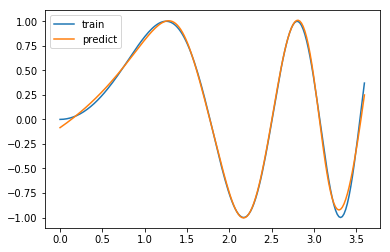

In [40]:
pred_x = model.predict(tmp_train_scaled_x)
pred_x = scaler_y.inverse_transform(pred_x)
mse = mean_squared_error(y_train, pred_x.flatten())
print(f'RMSE = {np.sqrt(mse)}')

plt.plot(X_train, y_train, label='train')
plt.plot(X_train, pred_x, label='predict')
plt.legend();

RMSE = 1.474425087511444


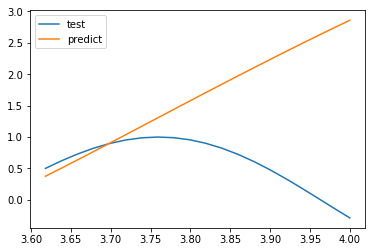

In [41]:
pred_x = model.predict(tmp_test_scaled_x[:, 0])
pred_x = scaler_y.inverse_transform(pred_x)
mse = mean_squared_error(y_test, pred_x.flatten())
print(f'RMSE = {np.sqrt(mse)}')

plt.plot(X_test, y_test, label='test')
plt.plot(X_test, pred_x, label='predict')
plt.legend();

## Задание 3

In [6]:
from neupy import algorithms
from neupy.layers import Input, Tanh, Linear

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\hwora\Anaconda3\envs\nn\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [13]:
lmnet = algorithms.LevenbergMarquardt((Input(1), Tanh(20), Linear(1)), verbose=True)


Main information

[ALGORITHM] LevenbergMarquardt

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] train_end_signal = None
[OPTION] addons = None
[OPTION] error = mse
[OPTION] mu = 0.01
[OPTION] mu_update_factor = 1.2

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.53 seconds


In [14]:
lmnet.train(X_train, y_train, epochs=100)


Start training

[TRAINING DATA] shapes: (180, 1)
[TRAINING] Total epochs: 100

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |     0.53458 |           - |      232 ms |
|           2 |       2.842 |           - |      228 ms |
|           3 |      71.493 |           - |      226 ms |
|           4 |      101.89 |           - |      240 ms |
|           5 |      258.73 |           - |      226 ms |
|           6 |       11621 |           - |      228 ms |
|           7 |      3574.8 |           - |      228 ms |
|           8 |      1111.3 |           - |      228 ms |
|           9 |      273.56 |           - |      230 ms |
|          10 |      67.065 |           - |      227 ms |
|          11 |      89.626 |           - |      239 ms |
|          12 |      75.467 |           - |      227 ms |
|          13 |      12.103 |           - |      2

RMSE = 0.0028896059995370954


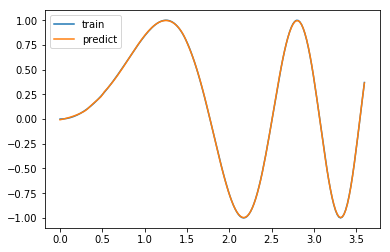

In [15]:
pred_x = lmnet.predict(X_train)
mse = mean_squared_error(y_train, pred_x.flatten())
print(f'RMSE = {np.sqrt(mse)}')

plt.plot(X_train, y_train, label='train')
plt.plot(X_train, pred_x, label='predict')
plt.legend();

RMSE = 0.6938150783180328


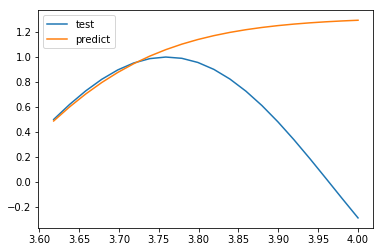

In [17]:
pred_x = lmnet.predict(X_test)
mse = mean_squared_error(y_test, pred_x.flatten())
print(f'RMSE = {np.sqrt(mse)}')

plt.plot(X_test, y_test, label='test')
plt.plot(X_test, pred_x, label='predict')
plt.legend();